# **Decision Tree with Python Scikit Learn**
## Author: Uday Syed
   www.linkedin.com/in/uday-syed

### Importing Libraries
Make sure these libraries are preinstalled using conda or pip

In [1]:
# Importing libraries in Python

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import sklearn.datasets as datasets
from matplotlib import pyplot as plt
from sklearn import tree

### Loading the Dataset

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
print("Data Loaded Succesfully")

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print('Does the "iris" dataframe has any Null or NaN value?  Ans: {} '.format(df.isnull().values.any()))
df.head(10)



Data Loaded Succesfully
Does the "iris" dataframe has any Null or NaN value?  Ans: False 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### Splicing Features and Target

In [3]:
#splicing features and target
X = iris.data[:, :4]  # we only take the first two features.
y = iris.target

print("Shape of X:{} Rows and {} Columns".format(X.shape[0],X.shape[1]))
print("Shape of y:{} Rows and 1 Column".format(y.shape[0]))




Shape of X:150 Rows and 4 Columns
Shape of y:150 Rows and 1 Column


### Splitting Train and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2,stratify=y, random_state=0)


### Decision Tree Model 1(Priliminary Approach)

In [5]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


#### *Now lets check if the model is overfitting or underfitting?*

In [6]:
ACC_CV0=cross_val_score(dtree,X_train,y_train,cv=20,scoring="accuracy",n_jobs=-1)
print("Accuracy of cross-validation in Model 1 : {}% ".format(ACC_CV0.mean()*100))
y_train_pred0=dtree.predict(X_train)
print("Training accuracy Model 1: {}% ".format(accuracy_score(y_train,y_train_pred0)*100))


Accuracy of cross-validation in Model 1 : 95.0% 
Training accuracy Model 1: 100.0% 


#### *We can see that Cross validation accuracy < Training set accuracy. so the model is overfitting.Our goal is to get*
####  *these two values as close as possible*

### Decision Tree Model 2(Minimizing Impurity Approach)

In [7]:
dt=DecisionTreeClassifier(criterion="gini",random_state=0)
dt.fit(X_train,y_train)
print("Training Complete")

Training Complete


In [8]:
ACC_CV1=cross_val_score(dt,X_train,y_train,cv=20,scoring="accuracy",n_jobs=-1)
print("Accuracy of cross-validation Model 2 : {}% ".format(ACC_CV1.mean()*100))
y_train_pred1=dt.predict(X_train)
print("Training accuracy Model 2 : {}% ".format(accuracy_score(y_train,y_train_pred1)*100))
y_pred=dt.predict(X_test)
#print(y_pred)
print("Test Accuracy Score Model 2 : {}% ".format(accuracy_score(y_test,y_pred)*100))

Accuracy of cross-validation Model 2 : 93.33333333333333% 
Training accuracy Model 2 : 100.0% 
Test Accuracy Score Model 2 : 96.66666666666667% 


#### *We can see that Cross validation accuracy < Training set accuracy. so the model is overfitting.Our goal is to get*
####  *these two values as close as possible*

### Decision Tree Model 3(Optimizing Hyperparameters by GridSearch Approach)

In [9]:
dt2=DecisionTreeClassifier(random_state=0)

params_dt={
    "max_depth":[1,2,3,4,5,6,7,8],
    "min_samples_leaf":list(map(lambda x:x/1000,range(1,100,1))),
    "max_features":[1,2,3,4]
}

grid_dt=GridSearchCV(estimator=dt2,param_grid=params_dt,scoring="accuracy",cv=20,n_jobs=-1)

In [10]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=20, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [0.001, 0.002, 0.003, 0.004, 0.005,
                                              0.006, 0.007, 0.008, 0.009, 0.01,
                                              0.011, 0.012, 0.013, 0.014, 0.015,
                                              0.016, 0.017, 0.018, 0.019, 0.02,
                                              0.021, 0.022, 0.023, 0.024, 0.025,
                                              0.026, 0.027, 0.028, 0.029, 0.03, ...]},
             scoring='accuracy')

In [11]:
#Selecting the model with best Hyperparameters
best_model=grid_dt.best_estimator_
print("Best Model's Cross Validation score: {}%".format(grid_dt.best_score_*100))
best_model.fit(X_train,y_train)
best_model_y_train_pred=best_model.predict(X_train)
print("Best Model's training score: {}%".format(accuracy_score(y_train,best_model_y_train_pred)*100))

Best Model's Cross Validation score: 95.83333333333333%
Best Model's training score: 96.66666666666667%


#### We can see that cross validation score and training score are close enough so the model is not overfitting

In [12]:
best_model_y_test_pred=best_model.predict(X_test)
print("Best Model's test score: {}%".format(accuracy_score(y_test,best_model_y_test_pred)*100))


Best Model's test score: 93.33333333333333%


### Visualizing the Decision Tree of Best Model

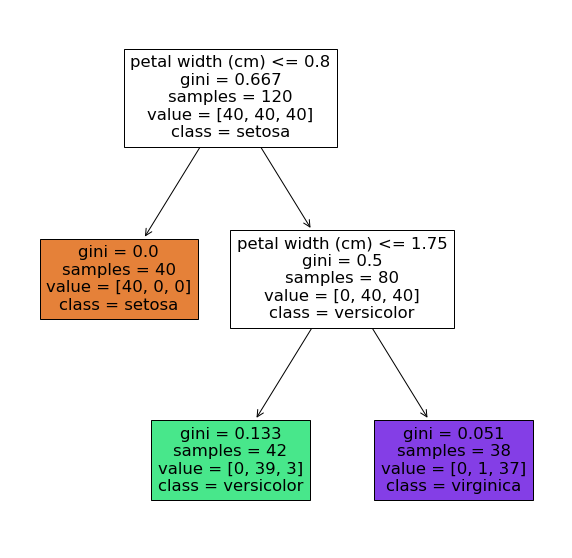

In [13]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(best_model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)


*The model took 120 samples and made 4 errors in predicting the label but as the max_depth is less So, the model is not overfitting and will do well in real life data*

In [14]:
### We can also see which feature is pre-dominant in this model

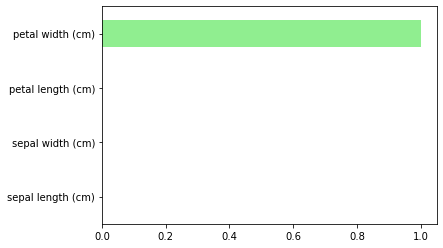

In [15]:
imp=pd.Series(data=best_model.feature_importances_,index=df.columns)
imp_sorted=imp.sort_values()
imp_sorted.plot(kind="barh",color="lightgreen")